<img src='../images/cbslogo.jpg' width="30%" align="left" />

# Explorative Datenanalyse
## - Phase: Data Understanding -

Das Ziel dieses Notebooks ist das Entdecken der uns vorliegenden Daten mit der Identifizierung erster Besonderheiten aber auch Qualitätsmängel. Zudem wurden hier bereits erste weiterführende Fragen zur Orientierung der weiterführenden Analyse aufgestellt.

Dieses Notebook nutzt die folgenden Dateien: trips_raw.pkl, trips_clean.pkl, tripdata_coordinates.pkl, Station_Data.csv.

Durch dieses Notebook werden keine weiteren Dateien erzeugt.

Vorbereitung: Module einbinden

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [2]:
RAWDATA_PATH = '../data/raw'
DATA_PATH = '../data/'
TRIPS_FILE = 'trips_raw.pkl'
STATION_LOCATION = RAWDATA_PATH+'/Station_Data.csv'
COMBINED_DATA = DATA_PATH + '/tripdata_coordinates.pkl'

In [3]:
df = pd.read_pickle(DATA_PATH +'tripdata_coordinates.pkl')

### Wir beginnen mit der deskriptiven Datenanalyse:

In [6]:
df.shape

(10232882, 16)

Der Datensatz besteht aus 16 Spalten und 10232882 Beobachtungen. Eine Beobachtung entspricht einem augeliehenen Fahrrad.
In unserer Datenanalyse stellt der Ausleihvorgang das Hauptaugenmerk dar.

In [8]:
# Wir wissen: Unsere Zielgröße ist die Analyse der Anzahl der ausgeliehenen Fahrräder. 
# Im ersten Schritt legen wir also die Fahrradnummer als naheliegendste Zielgröße fest.
TARGET = 'bike_number'

In [4]:
df.head()

,start_ts,end_ts,start_station_id,end_station_id,bike_number,Member type,start_date,start_hour,end_date,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station,start_day_of_week,end_day_of_week
0,2015-10-15 10:58:35,2015-10-15 14:57:10,31219,31634,?(0x0000000074BEBCE4),Member,2015-10-15,10,2015-10-15,14,38.893028,-77.026013,38.87501,-77.0024,Thursday,Thursday
1,2016-07-08 20:44:21,2016-07-08 21:11:54,31219,31634,W00099,Casual,2016-07-08,20,2016-07-08,21,38.893028,-77.026013,38.87501,-77.0024,Friday,Friday
2,2017-10-14 19:47:46,2017-10-14 20:02:32,31219,31634,W00139,Member,2017-10-14,19,2017-10-14,20,38.893028,-77.026013,38.87501,-77.0024,Saturday,Saturday
3,2017-05-14 15:50:53,2017-05-14 16:33:31,31219,31634,W00242,Casual,2017-05-14,15,2017-05-14,16,38.893028,-77.026013,38.87501,-77.0024,Sunday,Sunday
4,2016-06-22 19:03:37,2016-06-22 19:20:51,31219,31634,W00277,Member,2016-06-22,19,2016-06-22,19,38.893028,-77.026013,38.87501,-77.0024,Wednesday,Wednesday


 Das Einlesen war wohl erfolgreich...
...allerdings fällt uns direkt in der ersten Zeile eine etwas vom Standard abweichende Fahrradnummer auf.

In [12]:
# Wir wollen einen Überblick über die Standardmetriken und somit Verteilung der einzelnen Kategorien zu erhalten:
df.describe()

,start_station_id,end_station_id,start_hour,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station
count,1.023288e+07,1.023288e+07,1.023288e+07,1.023288e+07,1.023288e+07,1.023288e+07,1.023288e+07,1.023288e+07
mean,3.131214e+04,3.131291e+04,1.396184e+01,1.417818e+01,3.890168e+01,-7.703358e+01,3.890053e+01,-7.703297e+01
std,2.118838e+02,2.090978e+02,4.804140e+00,4.864247e+00,2.470865e-02,2.762716e-02,2.404722e-02,2.697558e-02
min,3.100000e+04,3.100000e+04,0.000000e+00,0.000000e+00,3.879756e+01,-7.736842e+01,3.879756e+01,-7.736842e+01
25%,3.120400e+04,3.120800e+04,1.000000e+01,1.000000e+01,3.889046e+01,-7.704500e+01,3.888999e+01,-7.704478e+01
50%,3.124900e+04,3.124800e+04,1.500000e+01,1.500000e+01,3.890041e+01,-7.703230e+01,3.890028e+01,-7.703230e+01
75%,3.140600e+04,3.140400e+04,1.800000e+01,1.800000e+01,3.891010e+01,-7.701780e+01,3.890939e+01,-7.701770e+01
max,3.222500e+04,3.222500e+04,2.300000e+01,2.300000e+01,3.912600e+01,-7.691356e+01,3.912600e+01,-7.691356e+01


#### Wir erkunden den Datensatz weiter deskriptiv:

Für einen ersten Eindruck über die unterschiedlichen Datentypen und Merkmale generieren wir den Pandas Profiling Report:

In [9]:
from pandas_profiling import ProfileReport

In [10]:
# Da der Datensatz sehr groß ist, generieren wir nur einen reduzierten Bericht, der auf speicherintensive Berechnungen wie z.B. der Korrelationen verzichtet.

In [11]:
#Der Report dieses Befehls befindet sich im Github Archiv.
#report = df.profile_report(minimal = True) 
profile = pp.ProfileReport(df)
#report.to_file(output_file="report.html")

# Explorative Datenanalyse

Wir wollen nun bestimmte Kategorien besonders genau erkunden. Wir schauen bei denjenigen Kategorien etwas genauer hin, von denen wir eine besondere Bedeutung für das Datenverständnis oder die Prognose erwarten.

In [13]:
col_list1=[TARGET, 'start_station_id', 'end_station_id']
df[col_list1]

,bike_number,start_station_id,end_station_id
0,?(0x0000000074BEBCE4),31219,31634
1,W00099,31219,31634
2,W00139,31219,31634
3,W00242,31219,31634
4,W00277,31219,31634
...,...,...,...
10232877,W23202,32211,32211
10232878,W23247,32211,32211
10232879,W23247,32211,32211
10232880,W23261,32211,32211


In [3]:
# Vgl. Ausleihvorgänge 0 - 4: 
# Die Fahrräder wurden an unterschiedlichen Stelle entnommen und abgegeben scheinen den identischen Weg zurückgelegt zu haben.

# Vgl. Ausleihvorgänge 10232877 - 10232881:
# Die Fahrräder wurden an den gleichen  Stellen entnommen und abgegeben. Es hat sich wohl um eine Rundfahrt gehandelt.

In [15]:
col_list2=[TARGET, 'start_ts', 'end_ts']
df[col_list2]

,bike_number,start_ts,end_ts
0,?(0x0000000074BEBCE4),2015-10-15 10:58:35,2015-10-15 14:57:10
1,W00099,2016-07-08 20:44:21,2016-07-08 21:11:54
2,W00139,2017-10-14 19:47:46,2017-10-14 20:02:32
3,W00242,2017-05-14 15:50:53,2017-05-14 16:33:31
4,W00277,2016-06-22 19:03:37,2016-06-22 19:20:51
...,...,...,...
10232877,W23202,2017-10-14 12:46:54,2017-10-14 13:14:53
10232878,W23247,2017-06-18 12:34:17,2017-06-18 16:42:29
10232879,W23247,2017-08-06 18:42:16,2017-08-06 19:12:20
10232880,W23261,2016-11-05 19:12:56,2016-11-05 20:11:14


Es ist erkennbar, dass wir anhand den uns vorliegenden Daten herausfinden können, welche Fahrradausleihvorgänge ungefähr gleich lang sind aber auch, mit welchen Fahrrädern an welchen Tagen Ausleih- und Rückgabeaktionen stattfinden. Es wäre auch denkbar anhand identischen Startstationen-IDs und Endstationen-IDs alle identischen Routen  herauszufiltern. Mit diesen Daten könnten weiterhin Annahmen über unterschiedliche Kundentypen angestellt werden und deren Verhaltensmustern zu entdecken.

#### Anhand dieser Datentabelle haben wir uns folgende Fragen gestellt:
- Gibt es Unterschiede in der Dauer der Fahrradvorgänge abhängig von den unterschiedlichen Fahrrädern? Gibt es Unterschiede im Modell (z.B. E-Bikes) oder in deren Zustand (z.B. Fahrräder kurz vor der Wartung)?
- Wie lange brauchen Nutzer für die identische Strecke?
- Gibt es Ausreißer bei der hier ersichtlichen Kurzfristigkeit des Ausleihvorgangs (also Ausleihen nur für 1 Tag)? 
- An welchen Tagen werden (welche Fahrräder/an welchen Stationen) am häufigsten ausgeliehen? Gibt es in der Verteilung Auffälligkeiten in den Ausleihvorgängen, die auf Veränderungen in der Infrastruktur hindeuten könnten?

Uns interessiert zudem folgender, Business-Understandig relevanter Punkt: Gibt es Fristen für die Ausleihdauer, z.B. keine Ausleihe über 24 Stunden/Tag? Sind bestimmte Dauern an einen bestimmten Status gekoppelt? Gibt es starke Unterschiede in der Nutzungsgebühr je nach zunehmender Dauer des Ausleihvorgangs oder gegebenenfalls Sonderkonditionen für sehr kurze Strecken/Dauern?
 

## Suche nach Ausreißern

### Überprüfung auf seltene Werte bei nominalen Merkmalen

In [17]:
df.describe(include='all')

C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silen

,start_ts,end_ts,start_station_id,end_station_id,bike_number,Member type,start_date,start_hour,end_date,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station,start_day_of_week,end_day_of_week
count,10232882,10232882,1.023288e+07,1.023288e+07,10232882,10232882,10232882,1.023288e+07,10232882,1.023288e+07,1.023288e+07,1.023288e+07,1.023288e+07,1.023288e+07,10232882,10232882
unique,9207674,9193138,NaN,NaN,4764,2,1092,NaN,1093,NaN,NaN,NaN,NaN,NaN,7,7
top,2016-07-20 17:35:24,2017-09-12 18:25:57,NaN,NaN,W21691,Member,2017-04-15 00:00:00,NaN,2017-04-15 00:00:00,NaN,NaN,NaN,NaN,NaN,Wednesday,Wednesday
freq,6,7,NaN,NaN,3899,7850613,16821,NaN,16782,NaN,NaN,NaN,NaN,NaN,1554870,1554646
first,2015-01-01 00:02:44,2015-01-01 00:12:20,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-31 23:58:21,2018-01-01 00:19:42,NaN,NaN,NaN,NaN,2017-12-31 00:00:00,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.131214e+04,3.131291e+04,NaN,NaN,NaN,1.396184e+01,NaN,1.417818e+01,3.890168e+01,-7.703358e+01,3.890053e+01,-7.703297e+01,NaN,NaN
std,NaN,NaN,2.118838e+02,2.090978e+02,NaN,NaN,NaN,4.804140e+00,NaN,4.864247e+00,2.470865e-02,2.762716e-02,2.404722e-02,2.697558e-02,NaN,NaN
min,NaN,NaN,3.100000e+04,3.100000e+04,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,3.879756e+01,-7.736842e+01,3.879756e+01,-7.736842e+01,NaN,NaN
25%,NaN,NaN,3.120400e+04,3.120800e+04,NaN,NaN,NaN,1.000000e+01,NaN,1.000000e+01,3.889046e+01,-7.704500e+01,3.888999e+01,-7.704478e+01,NaN,NaN


In [18]:
# Zusammenfassung der nominalen (nicht numerischen) Merkmale mit *describe*
df.describe(exclude=np.number)

C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
C:\Users\Deborah\anaconda3\lib\site-pack

,start_ts,end_ts,bike_number,Member type,start_date,end_date,start_day_of_week,end_day_of_week
count,10232882,10232882,10232882,10232882,10232882,10232882,10232882,10232882
unique,9207674,9193138,4764,2,1092,1093,7,7
top,2016-07-20 17:35:24,2017-09-12 18:25:57,W21691,Member,2017-04-15 00:00:00,2017-04-15 00:00:00,Wednesday,Wednesday
freq,6,7,3899,7850613,16821,16782,1554870,1554646
first,2015-01-01 00:02:44,2015-01-01 00:12:20,NaN,NaN,2015-01-01 00:00:00,2015-01-01 00:00:00,NaN,NaN
last,2017-12-31 23:58:21,2018-01-01 00:19:42,NaN,NaN,2017-12-31 00:00:00,2018-01-01 00:00:00,NaN,NaN


Hinweis: Die Fahrrad-Nr. (bike_number) setzt sich wie folgt zusammen: W + 5 Zahlen.
Gibt es hier ggf. eine bestimmte ID-Vergabe, die abhängig von Stations-IDs ist?

In [20]:
# Wir schauen uns die Häufigkeitsverteilungen der hier oben zusammengefassten Datentypen von links bis rechts an, um seltene Ausprägungen ausfindig zu machen.
df['start_ts'].value_counts()

2016-07-20 17:35:24    6
2016-04-03 15:32:05    6
2016-07-21 07:17:56    6
2016-06-29 08:10:38    6
2016-09-13 07:41:44    6
                      ..
2017-07-12 09:06:30    1
2017-03-18 16:14:01    1
2015-04-19 10:01:40    1
2017-07-03 23:32:45    1
2016-03-06 06:53:23    1
Name: start_ts, Length: 9207674, dtype: int64

In [21]:
df['end_ts'].value_counts()

2017-09-12 18:25:57    7
2017-05-03 18:36:58    7
2017-07-06 18:07:31    6
2017-10-07 10:49:27    6
2017-07-25 17:56:32    6
                      ..
2015-04-29 09:14:34    1
2017-02-13 14:50:57    1
2016-08-18 21:50:11    1
2017-10-06 18:05:45    1
2017-11-03 07:50:37    1
Name: end_ts, Length: 9193138, dtype: int64

In [4]:
# Hieraus kann auf den ersten Blick nichts erschlossen werden, wir sollten die Daten visualisieren.
# Können wir mithilfe der Stundenaggregation gegebenenfalls auch Top-Stationen herausfiltern und visualisieren?

In [23]:
df['bike_number'].value_counts()

W21691    3899
W21640    3831
W22170    3799
W21852    3770
W22072    3736
          ... 
W20062      23
W99910      22
W20105      15
W20181      14
W00896      12
Name: bike_number, Length: 4764, dtype: int64

Diese Daten haben nun folgende Fragen bei uns aufgeworfen:
- Wieso werden manche Fahrräder viel seltener ausgeliehen als andere?
- Können wir bestimmte Fahrräder mit bestimmten festen Stationen in Verbindung bringen?
- Können wir die Bewegung von Fahrrädern nachverfolgen und so z.B. nachvollziehen, an welchen Stationen deren "Bewegung" durch weitere Ausleihvorgänge stoppt? Unser erste Gedanke war hier: Sollen wir versuchen, eine Netzwerkanalyse anzuwenden?
- Gibt es Fahrräder die schnell wieder abgegeben werden als andere, was z.B. darauf hindeuten könnte, dass sie bald zur Wartung müssen oder, dass Nutzer Probleme damit haben? Gibt es längere, im Sinne von außerordentliche, Standzeiten? "Verschwinden" einzelne Fahrräder vielleicht sogar?
- Ggf. kann man hier auch erkennen, dass es Probleme beim Ausleihvorgang per se gibt, weil das Fahrrad sich von normalerweise viel frequentierten Stationeb nicht mehr wegbewegt?

In [25]:
df['start_date'].value_counts

<bound method IndexOpsMixin.value_counts of 0          2015-10-15
1          2016-07-08
2          2017-10-14
3          2017-05-14
4          2016-06-22
              ...    
10232877   2017-10-14
10232878   2017-06-18
10232879   2017-08-06
10232880   2016-11-05
10232881   2016-11-06
Name: start_date, Length: 10232882, dtype: datetime64[ns]>

In [26]:
df['end_date'].value_counts

<bound method IndexOpsMixin.value_counts of 0          2015-10-15
1          2016-07-08
2          2017-10-14
3          2017-05-14
4          2016-06-22
              ...    
10232877   2017-10-14
10232878   2017-06-18
10232879   2017-08-06
10232880   2016-11-05
10232881   2016-11-06
Name: end_date, Length: 10232882, dtype: datetime64[ns]>

In [27]:
# Hieraus kann auf den ersten Blick nichts erschlossen werden, wir sollten die Daten visualisieren.

Unsere ersten Erkenntnisse:
Die Verteilung Start- und End-Wochentage scheinen sich sehr zu ähneln.
Es ist auffällig, dass es im Großen und Ganzen unter der Woche mehr Ausleihvorgänge gibt als am Wochenende.
Wir sollten uns das genauer anschauen und bei den Ausleihvorgängen "unter der Woche" auch die Feier-/Ferientage aussortieren. Diese könnten z.B. mit Wochenendtagen gleichgesetzt werden.

Eine uns nun besonders beschäftigende Frage: Gibt es konkrete Verteilungs-/Verhaltensunterschiede am Wochenende und unter der Woche?

In [29]:
df['start_station_id'].value_counts()

31623    208889
31258    195279
31247    172899
31200    155122
31201    126116
          ...  
32072        23
31817        20
31819        11
31715        10
31815         8
Name: start_station_id, Length: 483, dtype: int64

In [30]:
df['end_station_id'].value_counts()

31623    218024
31258    195938
31247    178054
31200    173026
31201    135701
          ...  
31817        29
32072        16
31715        13
31815        13
31819         4
Name: end_station_id, Length: 483, dtype: int64

In [31]:
# Die Start- und End-Stationen werden sehr unterschiedlich häufig frequentiert.
# Wieso ist das so?!

### Überprüfung auf seltene Werte bei numerischen Merkmalen

In [32]:
df['start_station_id'].describe

<bound method NDFrame.describe of 0           31219
1           31219
2           31219
3           31219
4           31219
            ...  
10232877    32211
10232878    32211
10232879    32211
10232880    32211
10232881    32211
Name: start_station_id, Length: 10232882, dtype: int64>

In [33]:
df['end_station_id'].describe

<bound method NDFrame.describe of 0           31634
1           31634
2           31634
3           31634
4           31634
            ...  
10232877    32211
10232878    32211
10232879    32211
10232880    32211
10232881    32211
Name: end_station_id, Length: 10232882, dtype: int64>

In [34]:
# Wie häufig kommen welche Stationen vor?

In [35]:
df['start_station_id'].value_counts()

31623    208889
31258    195279
31247    172899
31200    155122
31201    126116
          ...  
32072        23
31817        20
31819        11
31715        10
31815         8
Name: start_station_id, Length: 483, dtype: int64

In [36]:
df['end_station_id'].value_counts()

31623    218024
31258    195938
31247    178054
31200    173026
31201    135701
          ...  
31817        29
32072        16
31715        13
31815        13
31819         4
Name: end_station_id, Length: 483, dtype: int64

In [37]:
df['start_hour'].describe

<bound method NDFrame.describe of 0           10
1           20
2           19
3           15
4           19
            ..
10232877    12
10232878    12
10232879    18
10232880    19
10232881    15
Name: start_hour, Length: 10232882, dtype: int64>

In [38]:
df['end_hour'].describe

<bound method NDFrame.describe of 0           14
1           21
2           20
3           16
4           19
            ..
10232877    13
10232878    16
10232879    19
10232880    20
10232881    15
Name: end_hour, Length: 10232882, dtype: int64>

In [39]:
# Wie häufig sind welche Start- und End-Uhrzeiten vorhanden?

In [40]:
df['start_hour'].value_counts()

17    1128191
18     942794
8      850096
16     783326
19     637606
15     620498
13     579431
12     578444
14     562783
7      561741
9      501529
11     487385
20     443630
10     408395
21     322256
22     231638
6      212323
23     139564
0       79622
5       62366
1       46068
2       28276
3       13702
4       11218
Name: start_hour, dtype: int64

In [41]:
df['end_hour'].value_counts()

17    1094889
18    1031221
8      837296
16     745540
19     704018
15     604789
13     573041
9      553791
14     552100
12     551605
20     491044
7      469323
11     439571
10     380479
21     349575
22     259139
6      174141
23     163163
0       93273
1       53962
5       50276
2       32809
3       17194
4       10643
Name: end_hour, dtype: int64

#### Um Ausreißer in Ausleihvorgängen besser zu erkennen, versuchen wir sie im ersten Schritt in Boxplots zu visualisieren.

In [42]:
# Wir schauen uns die nominalen Werte in Verbindung mit der Zielgröße an.

In [43]:
df.select_dtypes(include=[np.number]).columns

Index(['start_station_id', 'end_station_id', 'start_hour', 'end_hour',
       'Latitude_start_station', 'Longitude_start_station',
       'Latitude_end_station', 'Longitude_end_station'],
      dtype='object')

Um uns die Ausleihvorgänge der einzelnen Fahrräder pro Wochentag anzuschauen, brauchen wir die Summe der Häufigkeiten der ausgeliehenen Fahrräder an den einzelnen Wochentagen.

In [45]:
col_num = df.select_dtypes(include=[np.number]).columns
col_num

Index(['start_station_id', 'end_station_id', 'start_hour', 'end_hour',
       'Latitude_start_station', 'Longitude_start_station',
       'Latitude_end_station', 'Longitude_end_station'],
      dtype='object')

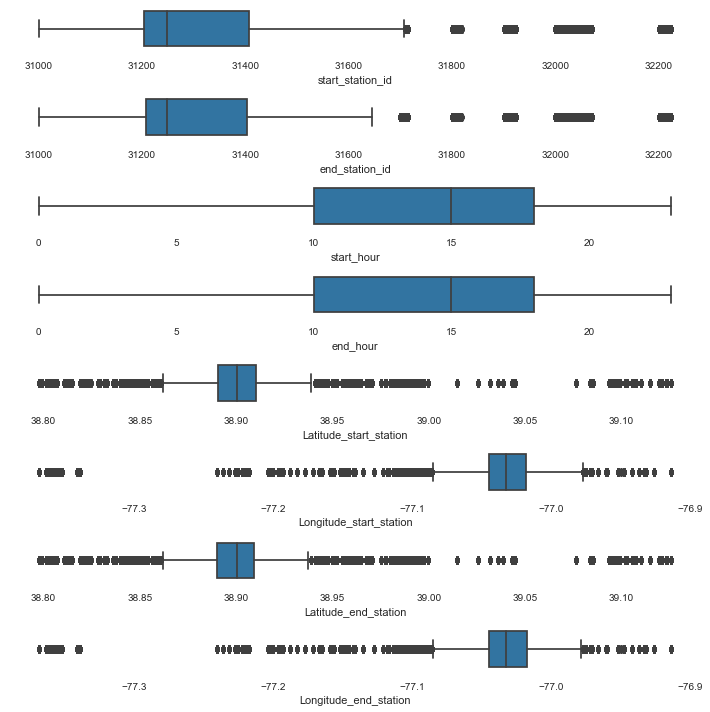

In [46]:
# Visuelle Überprüfung auf Ausreißer mit Hilfe von individuellen Boxplots
def show_boxplots(df):
    # Namen der numerische Merkmale extrahieren
    cols_num = df.select_dtypes(include=[np.number]).columns
    fig, axes = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(10,10))
    # Boxplot für jedes numerische Merkmal
    for i in range(len(cols_num)):
        sns.boxplot(x=cols_num[i], orient='h', data=df, ax=axes[i])

    # improve spacing and show
    fig.tight_layout()
    plt.show()

show_boxplots(df)

In [68]:
def outliers_boxplot(values):
    q1, q3 = np.percentile(values, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((values > upper_bound) | (values < lower_bound))
    return (values > upper_bound) | (values < lower_bound)

In [67]:
outliers_boxplot(df.select_dtypes(include=[np.number]))

(array([       0,        0,        1, ..., 10232880, 10232881, 10232881],
       dtype=int64),
 array([0, 1, 0, ..., 1, 0, 1], dtype=int64))

In [6]:
# print(df[ np.abs(df['start_date'] - df['start_date'].mean()) > 1.5*df['start_date'].std() ])
# Funktioniert erst nach Standardisierung.

### Verteilung der Zielgröße "Bike_number"

In [48]:
ht = df[TARGET].value_counts()
ht

W21691    3899
W21640    3831
W22170    3799
W21852    3770
W22072    3736
          ... 
W20062      23
W99910      22
W20105      15
W20181      14
W00896      12
Name: bike_number, Length: 4764, dtype: int64

In [49]:
ht.index

Index(['W21691', 'W21640', 'W22170', 'W21852', 'W22072', 'W21735', 'W21714',
       'W21041', 'W22131', 'W21512',
       ...
       'W00924', 'W23043', 'W23413', 'W00096', 'W23415', 'W20062', 'W99910',
       'W20105', 'W20181', 'W00896'],
      dtype='object', length=4764)

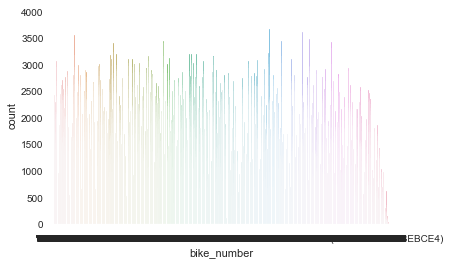

In [50]:
sns.countplot(x=TARGET, data=df.sample(frac=1.0));

##### Häufigkeitsverteilung:

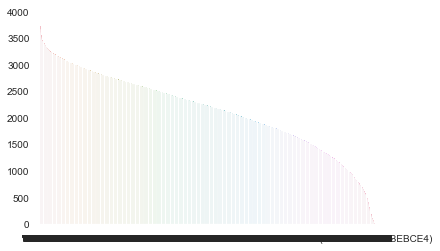

In [51]:
sns.barplot(ht.index,ht.values, order=ht.index.values, tick_label = ht.values);

In [52]:
# Man kann erkennen, dass manche Fahrräder im Vergleich zu Anderen unterdurchschnittlich selten ausgeliehen werden.

### Verteilung der Zielgröße "start_station_id"

In [53]:
TARGET2='start_station_id'
ht2 = df[TARGET2].value_counts()
ht2

31623    208889
31258    195279
31247    172899
31200    155122
31201    126116
          ...  
32072        23
31817        20
31819        11
31715        10
31815         8
Name: start_station_id, Length: 483, dtype: int64

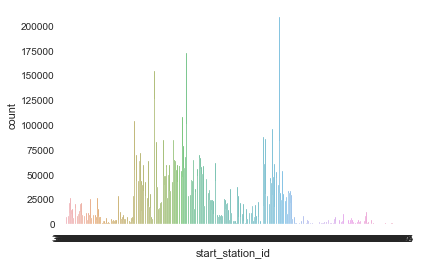

In [54]:
sns.countplot(x=TARGET2, data=df.sample(frac=1.0));

##### Häufigkeitsverteilung (Achtung, andere Farben!)

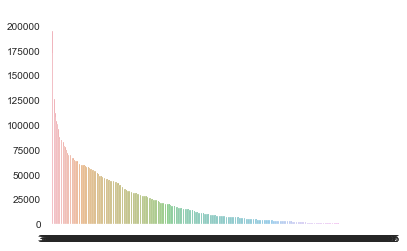

In [55]:
sns.barplot(ht2.index,ht2.values, order=ht2.index.values, tick_label = ht2.values);

### Verteilung der Zielgröße "end_station_id"

In [56]:
TARGET3='end_station_id'
ht3 = df[TARGET3].value_counts()
ht3

31623    218024
31258    195938
31247    178054
31200    173026
31201    135701
          ...  
31817        29
32072        16
31715        13
31815        13
31819         4
Name: end_station_id, Length: 483, dtype: int64

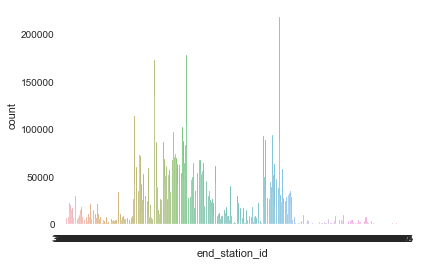

In [57]:
sns.countplot(x=TARGET3, data=df.sample(frac=1.0));

#####  Häufigkeitsverteilung (Achtung, andere Farben!)

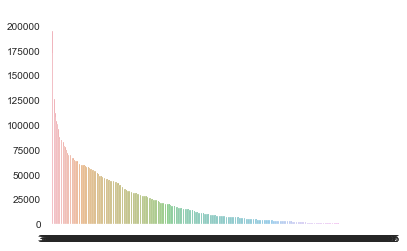

In [58]:
sns.barplot(ht2.index,ht2.values, order=ht2.index.values, tick_label = ht2.values);

### Zusammenhänge (Kollinearitäten) zwischen numerischen Merkmalen

In [60]:
df.corr()

,start_station_id,end_station_id,start_hour,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station
start_station_id,1.000000,0.528976,-0.047416,-0.047174,0.246552,0.383924,0.234865,0.252703
end_station_id,0.528976,1.000000,0.030742,0.028078,0.218945,0.256364,0.243144,0.393949
start_hour,-0.047416,0.030742,1.000000,0.954829,-0.038588,-0.032448,0.049207,0.042448
end_hour,-0.047174,0.028078,0.954829,1.000000,-0.043121,-0.035338,0.042160,0.038500
Latitude_start_station,0.246552,0.218945,-0.038588,-0.043121,1.000000,-0.134610,0.832780,-0.123934
Longitude_start_station,0.383924,0.256364,-0.032448,-0.035338,-0.134610,1.000000,-0.118696,0.781183
Latitude_end_station,0.234865,0.243144,0.049207,0.042160,0.832780,-0.118696,1.000000,-0.130350
Longitude_end_station,0.252703,0.393949,0.042448,0.038500,-0.123934,0.781183,-0.130350,1.000000


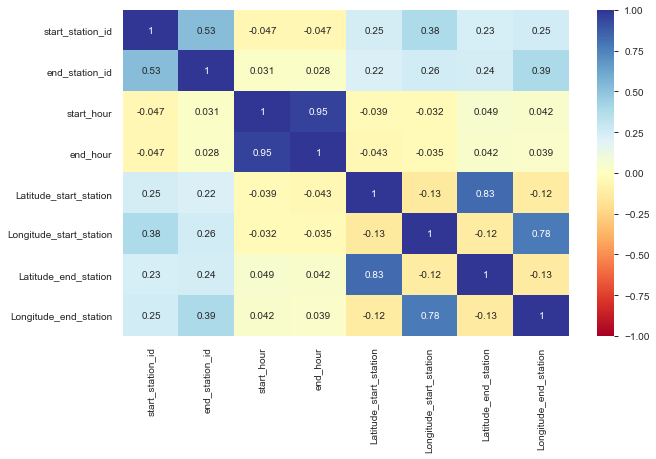

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="RdYlBu");

In [7]:
# Es scheint einen starken positiven Zusammenhang zwischen Startzeit und Endzeit des Ausleihvorgangs zu geben.
# Es scheint einen schwachen positiven Zusammenhang zwischen der Start- und der End-Station geben.